# DATA ANALYSIS OF A MULTICUISINE RESTAURANT FROM EXPLORATORY ANALYSIS

### DISHA K SANKETH

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:/SQL/TRIAL2.csv")

In [3]:
df.head()

,ITEM LIST,CUISINE,UNITS SOLD,POPULARITY,ITEM FOOD COST,ITEM SELL PRICE,ITEM PROFIT,TOTAL COST,TOTAL REVENUE
0,ITEM1,ITALIAN,100,94%,4.56,10.11,5.55,1011.00,1011.00
1,ITEM2,CHINESE,75,85%,3.65,9.43,5.78,707.25,707.25
2,ITEM3,JAPANESE,25,30%,5.11,12.11,7.00,302.75,302.75
3,ITEM4,INDIAN,100,78%,2.33,8.34,6.01,834.00,834.00
4,ITEM5,AMERICAN,50,50%,3.67,10.00,6.33,500.00,500.00


# Univariate analysis of the data

In [4]:
df.describe()

,UNITS SOLD,ITEM FOOD COST,ITEM SELL PRICE,ITEM PROFIT,TOTAL COST,TOTAL REVENUE
count,300.000000,300.000000,300.000000,300.00000,300.000000,300.000000
mean,65.600000,3.874333,11.019333,7.14500,724.164000,724.164000
std,24.939526,1.269945,1.440246,1.59074,297.054444,297.054444
min,20.000000,1.550000,8.340000,4.28000,184.600000,184.600000
25%,45.000000,2.650000,10.000000,6.22000,500.000000,500.000000
50%,66.000000,3.720000,11.110000,7.06000,702.420000,702.420000
75%,88.000000,4.950000,12.340000,7.76000,1011.000000,1011.000000
max,100.000000,5.990000,13.110000,11.00000,1243.000000,1243.000000


<AxesSubplot:xlabel='UNITS SOLD', ylabel='Density'>

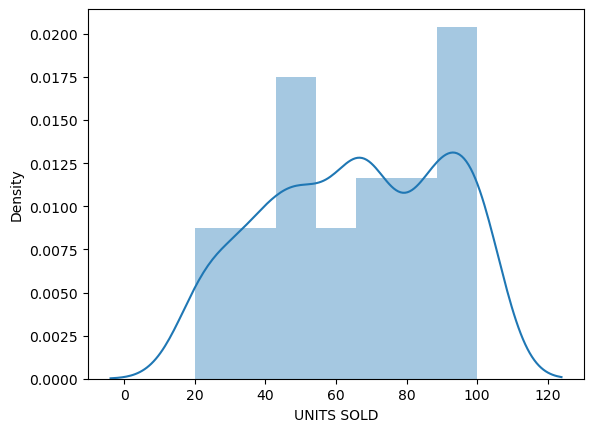

In [5]:
sns.distplot(df['UNITS SOLD'])

In [6]:
df.columns

Index(['ITEM LIST', 'CUISINE', 'UNITS SOLD', 'POPULARITY', 'ITEM FOOD COST',
       'ITEM SELL PRICE', 'ITEM PROFIT', 'TOTAL COST', 'TOTAL REVENUE'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

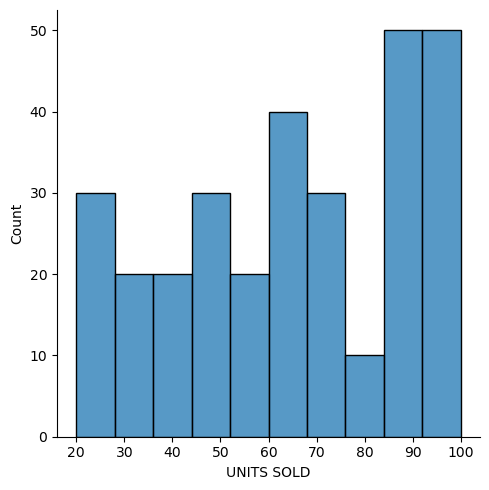

<Figure size 640x480 with 0 Axes>

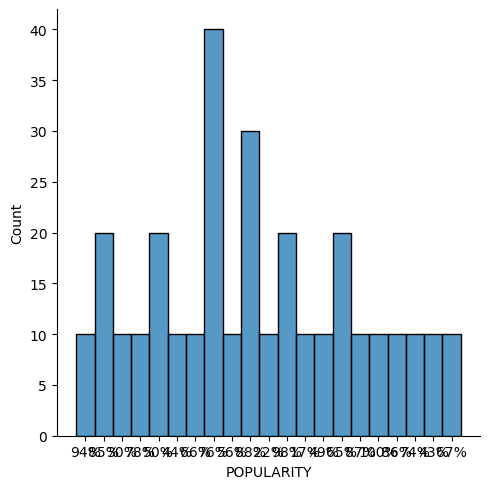

<Figure size 640x480 with 0 Axes>

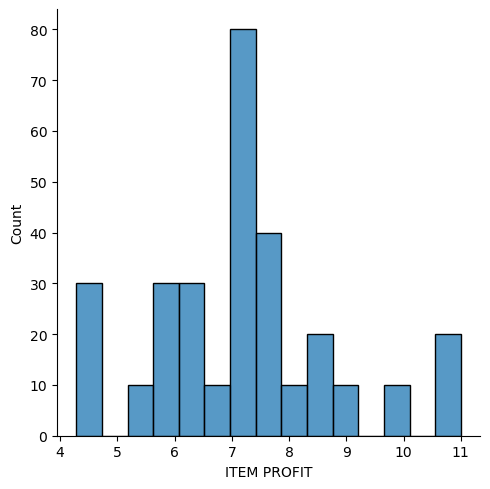

<Figure size 640x480 with 0 Axes>

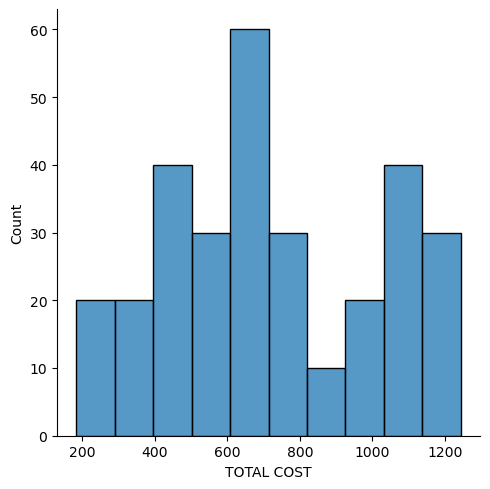

In [7]:
columns=['UNITS SOLD','POPULARITY','ITEM PROFIT', 'TOTAL COST']
for i in columns:
    plt.figure()
    sns.displot(df[i])

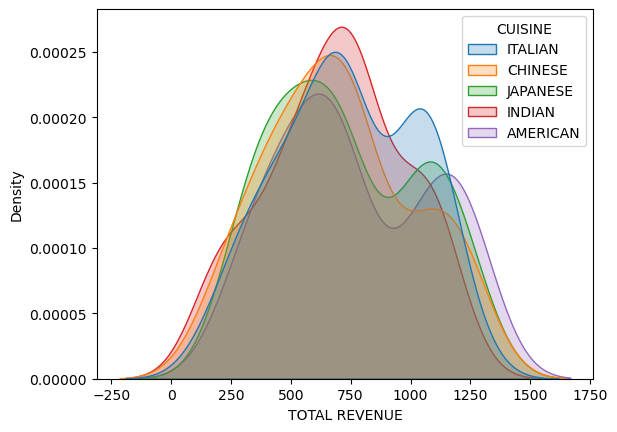

In [8]:
sns.kdeplot(df['TOTAL REVENUE'],shade=True,hue=df['CUISINE']);

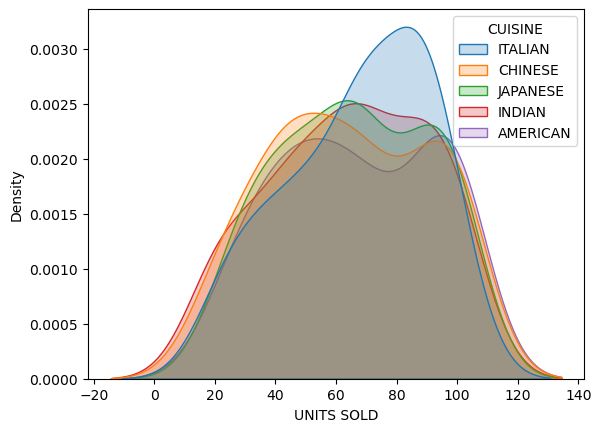

In [9]:
columns = ['UNITS SOLD']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade=True,hue=df['CUISINE'])

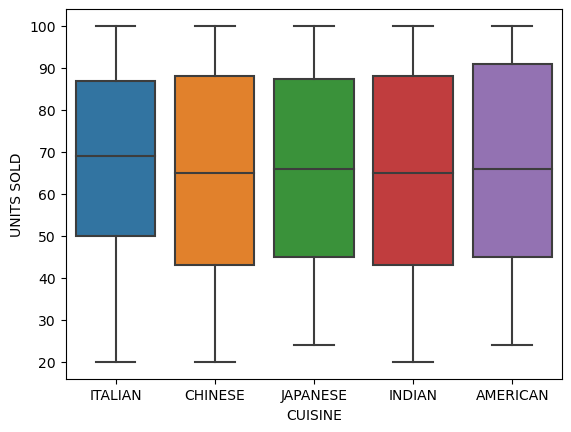

In [10]:
columns = ['UNITS SOLD']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='CUISINE',y=df[i])

In [11]:
df.head()

,ITEM LIST,CUISINE,UNITS SOLD,POPULARITY,ITEM FOOD COST,ITEM SELL PRICE,ITEM PROFIT,TOTAL COST,TOTAL REVENUE
0,ITEM1,ITALIAN,100,94%,4.56,10.11,5.55,1011.00,1011.00
1,ITEM2,CHINESE,75,85%,3.65,9.43,5.78,707.25,707.25
2,ITEM3,JAPANESE,25,30%,5.11,12.11,7.00,302.75,302.75
3,ITEM4,INDIAN,100,78%,2.33,8.34,6.01,834.00,834.00
4,ITEM5,AMERICAN,50,50%,3.67,10.00,6.33,500.00,500.00


In [12]:
df['CUISINE'].value_counts()

ITALIAN     62
CHINESE     61
INDIAN      61
JAPANESE    60
AMERICAN    56
Name: CUISINE, dtype: int64

In [13]:
df['CUISINE'].value_counts(normalize=True)

ITALIAN     0.206667
CHINESE     0.203333
INDIAN      0.203333
JAPANESE    0.200000
AMERICAN    0.186667
Name: CUISINE, dtype: float64

# Bivariate Analysis of data

<AxesSubplot:xlabel='CUISINE', ylabel='TOTAL REVENUE'>

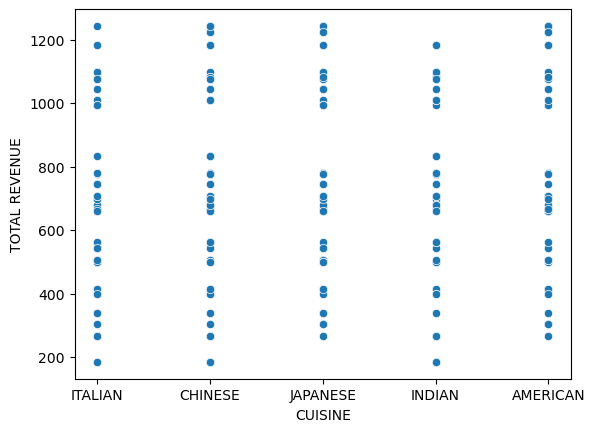

In [14]:
sns.scatterplot(data=df, x='CUISINE',y='TOTAL REVENUE')

<AxesSubplot:xlabel='UNITS SOLD', ylabel='TOTAL REVENUE'>

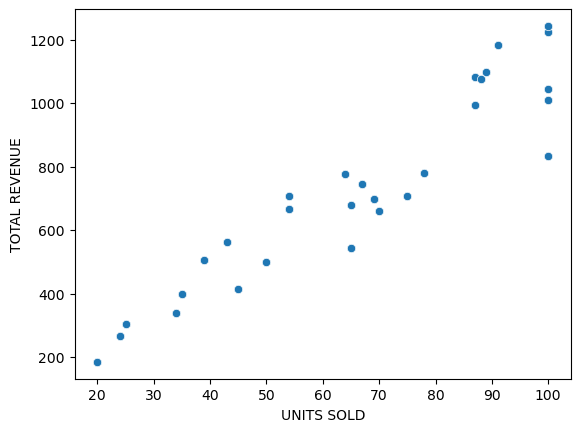

In [15]:
sns.scatterplot(data=df, x='UNITS SOLD',y='TOTAL REVENUE')

<AxesSubplot:xlabel='ITEM LIST', ylabel='POPULARITY'>

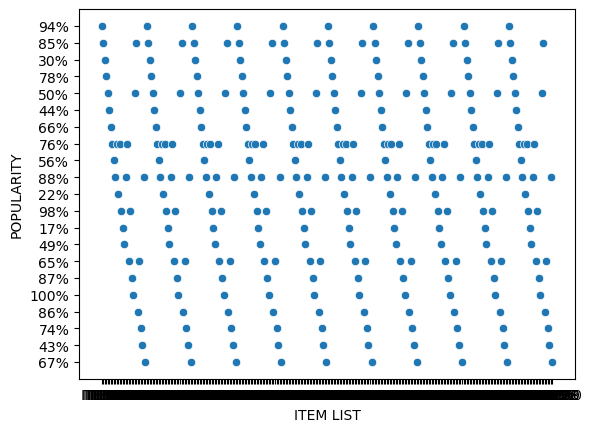

In [16]:
sns.scatterplot(data=df, x='ITEM LIST',y='POPULARITY')

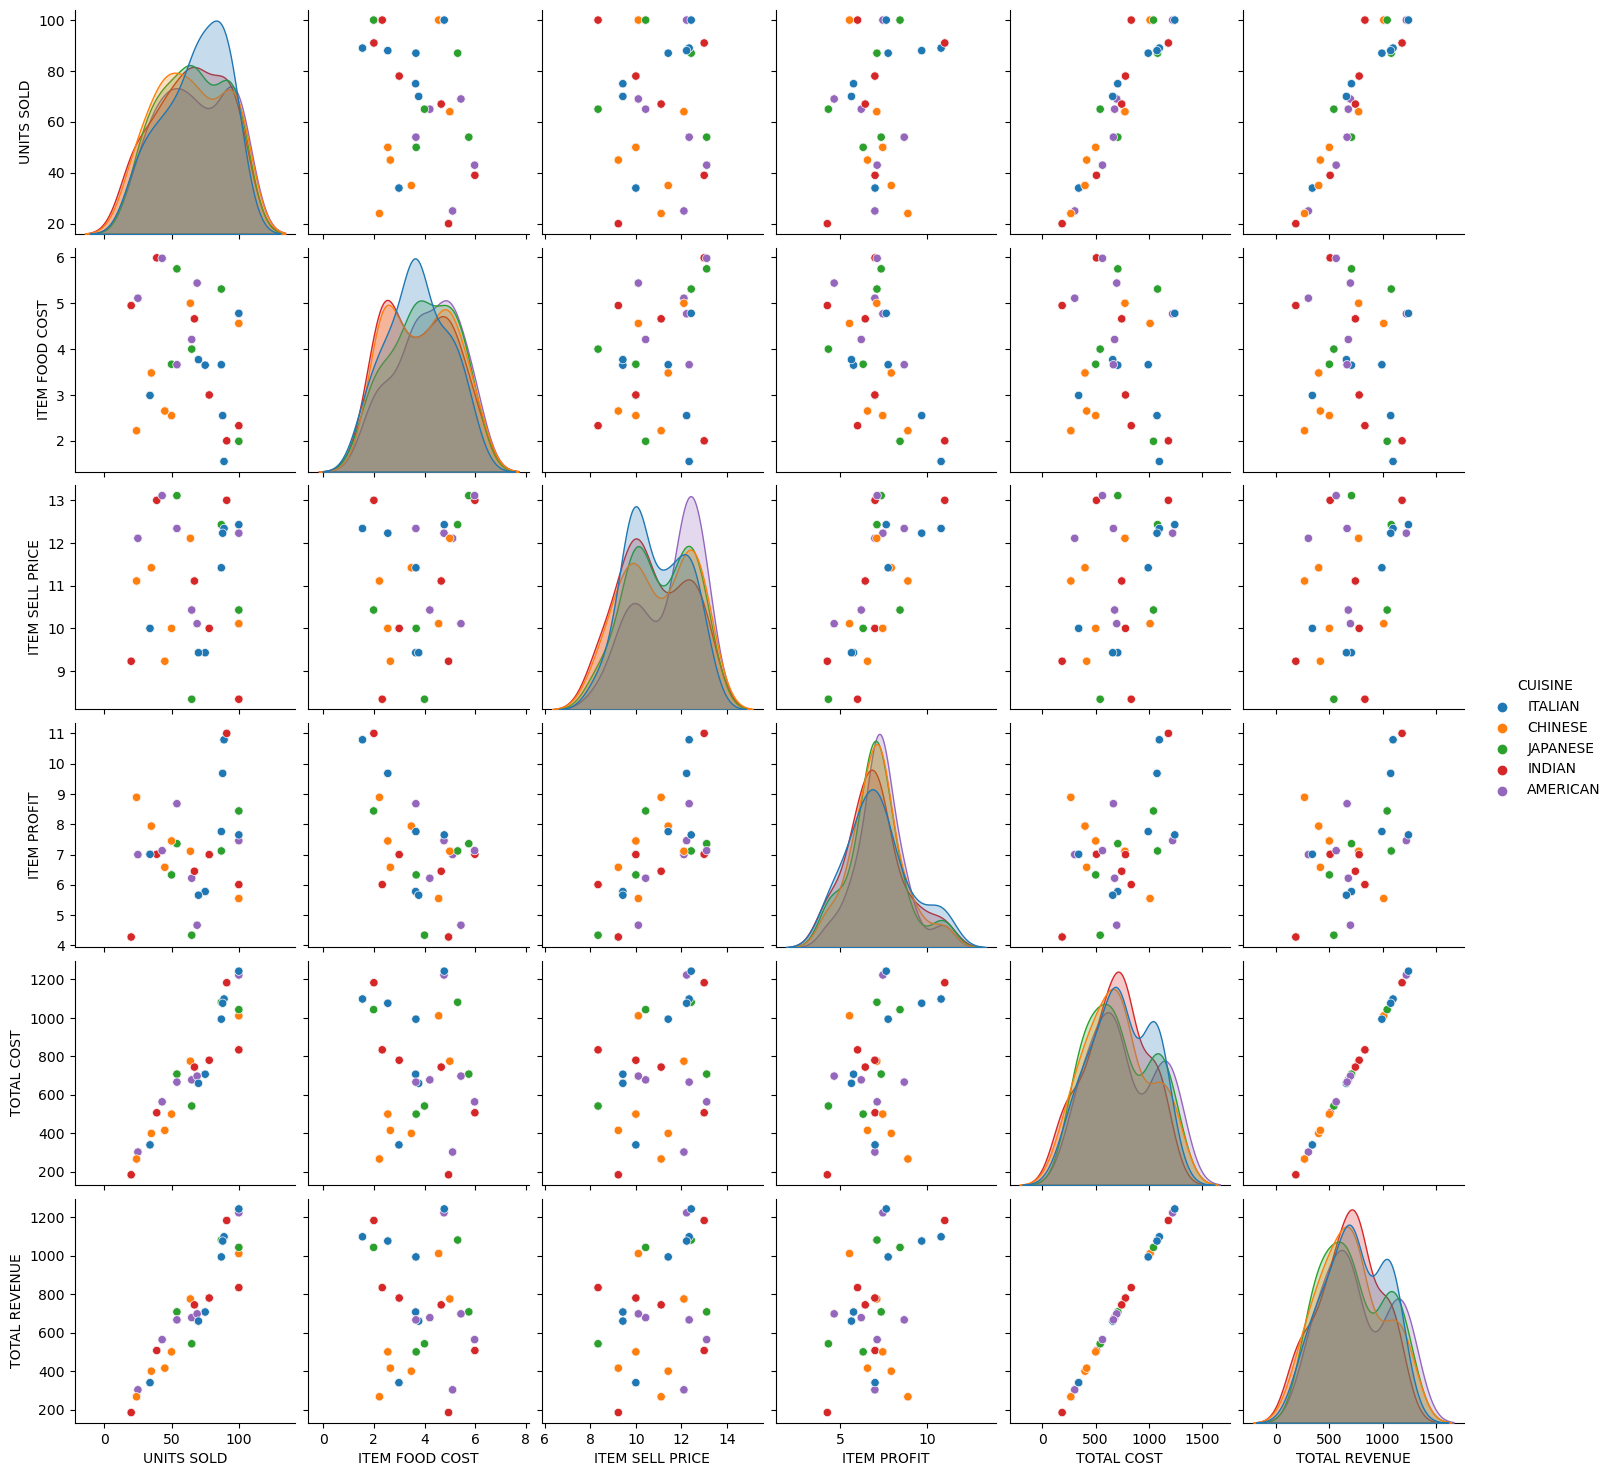

In [17]:
sns.pairplot(df,hue='CUISINE')

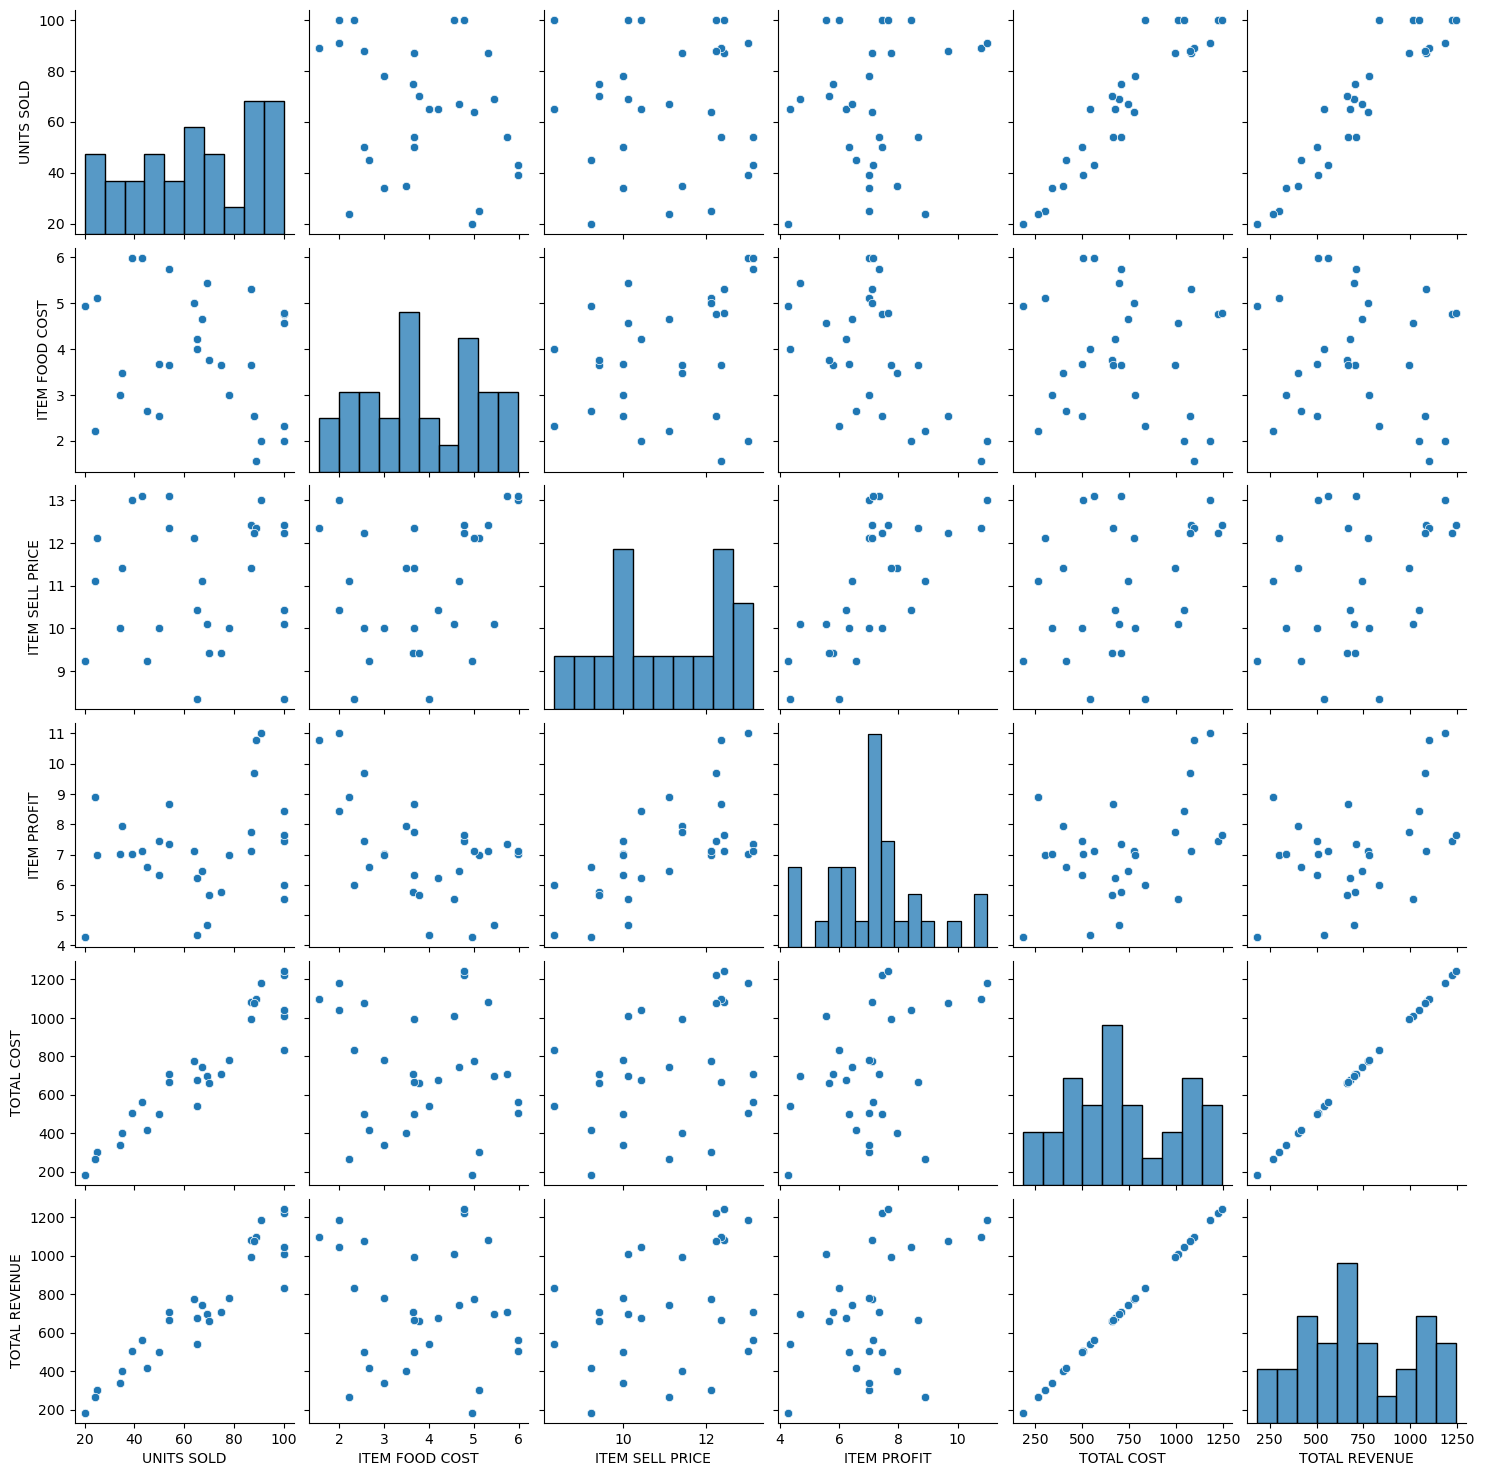

In [18]:
sns.pairplot(df)

In [19]:
df.groupby(['ITEM LIST'])['UNITS SOLD','POPULARITY','ITEM PROFIT'].mean()

,UNITS SOLD,ITEM PROFIT
ITEM LIST,,
ITEM1,100.0,5.55
ITEM10,87.0,7.12
ITEM100,87.0,7.12
ITEM101,54.0,7.36
ITEM102,24.0,8.89
...,...,...
ITEM95,50.0,6.33
ITEM96,39.0,7.01
ITEM97,65.0,6.22


In [20]:
df.corr()

,UNITS SOLD,ITEM FOOD COST,ITEM SELL PRICE,ITEM PROFIT,TOTAL COST,TOTAL REVENUE
UNITS SOLD,1.000000,-0.223274,0.036194,0.211018,0.939015,0.939015
ITEM FOOD COST,-0.223274,1.000000,0.316182,-0.512067,-0.125359,-0.125359
ITEM SELL PRICE,0.036194,0.316182,1.000000,0.652974,0.356611,0.356611
ITEM PROFIT,0.211018,-0.512067,0.652974,1.000000,0.422952,0.422952
TOTAL COST,0.939015,-0.125359,0.356611,0.422952,1.000000,1.000000
TOTAL REVENUE,0.939015,-0.125359,0.356611,0.422952,1.000000,1.000000


<AxesSubplot:>

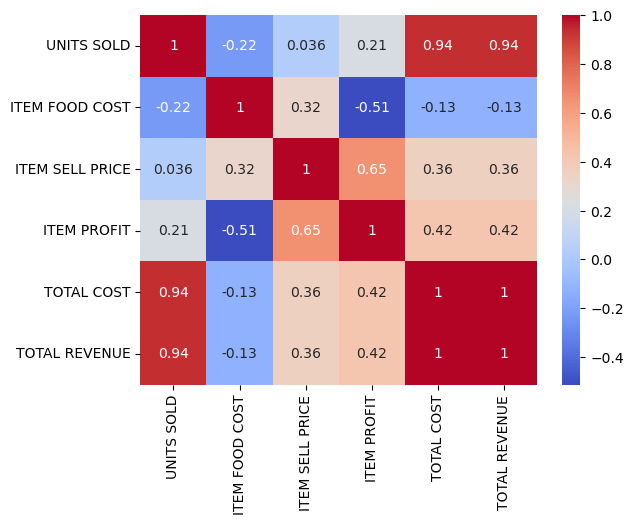

In [21]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [22]:
df.head()

,ITEM LIST,CUISINE,UNITS SOLD,POPULARITY,ITEM FOOD COST,ITEM SELL PRICE,ITEM PROFIT,TOTAL COST,TOTAL REVENUE
0,ITEM1,ITALIAN,100,94%,4.56,10.11,5.55,1011.00,1011.00
1,ITEM2,CHINESE,75,85%,3.65,9.43,5.78,707.25,707.25
2,ITEM3,JAPANESE,25,30%,5.11,12.11,7.00,302.75,302.75
3,ITEM4,INDIAN,100,78%,2.33,8.34,6.01,834.00,834.00
4,ITEM5,AMERICAN,50,50%,3.67,10.00,6.33,500.00,500.00


# clustering

In [23]:
clustering1 = KMeans()

In [24]:
clustering1.fit(df[['TOTAL REVENUE']])

KMeans()

In [25]:
clustering1.labels_

array([2, 5, 0, 1, 3, 3, 5, 0, 6, 2, 5, 0, 2, 4, 7, 5, 5, 1, 3, 1, 4, 2,
       3, 2, 4, 3, 1, 5, 2, 6, 2, 5, 0, 1, 3, 3, 5, 0, 6, 2, 5, 0, 2, 4,
       7, 5, 5, 1, 3, 1, 4, 2, 3, 2, 4, 3, 1, 5, 2, 6, 2, 5, 0, 1, 3, 3,
       5, 0, 6, 2, 5, 0, 2, 4, 7, 5, 5, 1, 3, 1, 4, 2, 3, 2, 4, 3, 1, 5,
       2, 6, 2, 5, 0, 1, 3, 3, 5, 0, 6, 2, 5, 0, 2, 4, 7, 5, 5, 1, 3, 1,
       4, 2, 3, 2, 4, 3, 1, 5, 2, 6, 2, 5, 0, 1, 3, 3, 5, 0, 6, 2, 5, 0,
       2, 4, 7, 5, 5, 1, 3, 1, 4, 2, 3, 2, 4, 3, 1, 5, 2, 6, 2, 5, 0, 1,
       3, 3, 5, 0, 6, 2, 5, 0, 2, 4, 7, 5, 5, 1, 3, 1, 4, 2, 3, 2, 4, 3,
       1, 5, 2, 6, 2, 5, 0, 1, 3, 3, 5, 0, 6, 2, 5, 0, 2, 4, 7, 5, 5, 1,
       3, 1, 4, 2, 3, 2, 4, 3, 1, 5, 2, 6, 2, 5, 0, 1, 3, 3, 5, 0, 6, 2,
       5, 0, 2, 4, 7, 5, 5, 1, 3, 1, 4, 2, 3, 2, 4, 3, 1, 5, 2, 6, 2, 5,
       0, 1, 3, 3, 5, 0, 6, 2, 5, 0, 2, 4, 7, 5, 5, 1, 3, 1, 4, 2, 3, 2,
       4, 3, 1, 5, 2, 6, 2, 5, 0, 1, 3, 3, 5, 0, 6, 2, 5, 0, 2, 4, 7, 5,
       5, 1, 3, 1, 4, 2, 3, 2, 4, 3, 1, 5, 2, 6])

In [26]:
df['Total Revenue'] = clustering1.labels_
df.head()

,ITEM LIST,CUISINE,UNITS SOLD,POPULARITY,ITEM FOOD COST,ITEM SELL PRICE,ITEM PROFIT,TOTAL COST,TOTAL REVENUE,Total Revenue
0,ITEM1,ITALIAN,100,94%,4.56,10.11,5.55,1011.00,1011.00,2
1,ITEM2,CHINESE,75,85%,3.65,9.43,5.78,707.25,707.25,5
2,ITEM3,JAPANESE,25,30%,5.11,12.11,7.00,302.75,302.75,0
3,ITEM4,INDIAN,100,78%,2.33,8.34,6.01,834.00,834.00,1
4,ITEM5,AMERICAN,50,50%,3.67,10.00,6.33,500.00,500.00,3


In [27]:
df['Total Revenue'].value_counts()

2    60
5    60
3    50
1    40
0    30
4    30
6    20
7    10
Name: Total Revenue, dtype: int64

In [28]:
clustering1.inertia_

231303.93345000013

In [29]:
inertia_scores=[]
for i in range(1,7):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['TOTAL REVENUE']])
    inertia_scores.append(kmeans.inertia_)

In [30]:
inertia_scores

[26384161.4032,
 7535644.49905,
 2471879.09850101,
 1301788.3217341267,
 752271.8203452382,
 525737.4499285715]

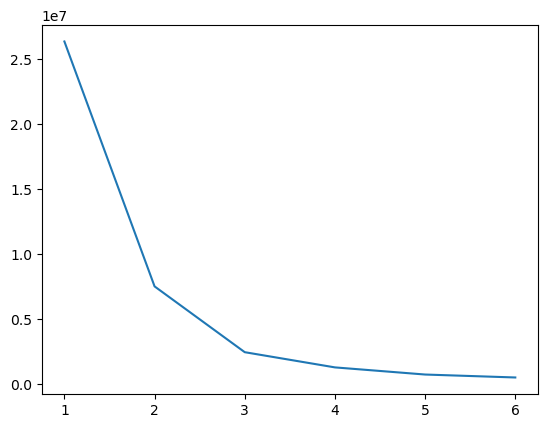

In [31]:
plt.plot(range(1,7),inertia_scores)

In [32]:
df.groupby('Total Revenue')['UNITS SOLD','POPULARITY','ITEM PROFIT', 'TOTAL COST'].mean()

,UNITS SOLD,ITEM PROFIT,TOTAL COST
Total Revenue,,,
0,27.666667,7.633333,303.130000
1,77.250000,6.642500,783.352500
2,91.833333,8.223333,1050.575000
3,49.400000,6.452000,522.566000
4,97.000000,8.703333,1216.333333
5,64.500000,6.395000,686.198333
6,40.000000,7.260000,407.525000
7,20.000000,4.280000,184.600000


In [33]:
clustering2 = KMeans()
clustering2.fit(df[['UNITS SOLD']])
df['New Revenue'] =clustering2.labels_
df.head()

,ITEM LIST,CUISINE,UNITS SOLD,POPULARITY,ITEM FOOD COST,ITEM SELL PRICE,ITEM PROFIT,TOTAL COST,TOTAL REVENUE,Total Revenue,New Revenue
0,ITEM1,ITALIAN,100,94%,4.56,10.11,5.55,1011.00,1011.00,2,4
1,ITEM2,CHINESE,75,85%,3.65,9.43,5.78,707.25,707.25,5,6
2,ITEM3,JAPANESE,25,30%,5.11,12.11,7.00,302.75,302.75,0,5
3,ITEM4,INDIAN,100,78%,2.33,8.34,6.01,834.00,834.00,1,4
4,ITEM5,AMERICAN,50,50%,3.67,10.00,6.33,500.00,500.00,3,3


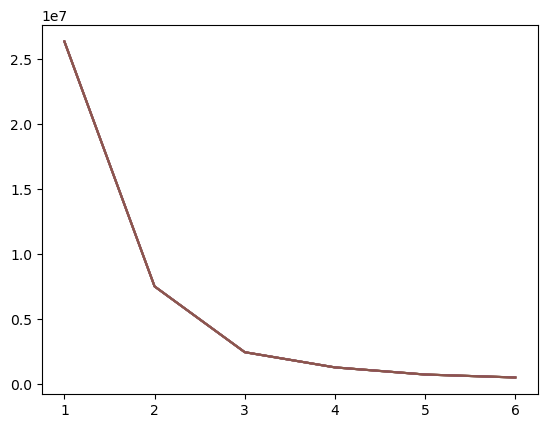

In [34]:
inertia_scores2=[]
for i in range(1,7):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['TOTAL REVENUE']])
    inertia_scores2.append(kmeans2.inertia_)
    plt.plot(range(1,7),inertia_scores)

<AxesSubplot:xlabel='UNITS SOLD', ylabel='POPULARITY'>

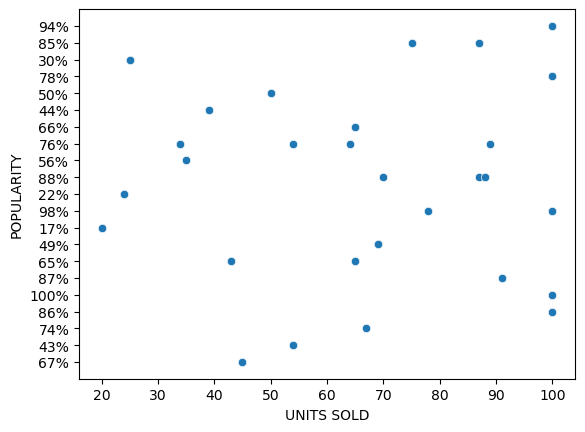

In [35]:
sns.scatterplot(data=df, x='UNITS SOLD',y='POPULARITY')

<AxesSubplot:xlabel='UNITS SOLD', ylabel='TOTAL REVENUE'>

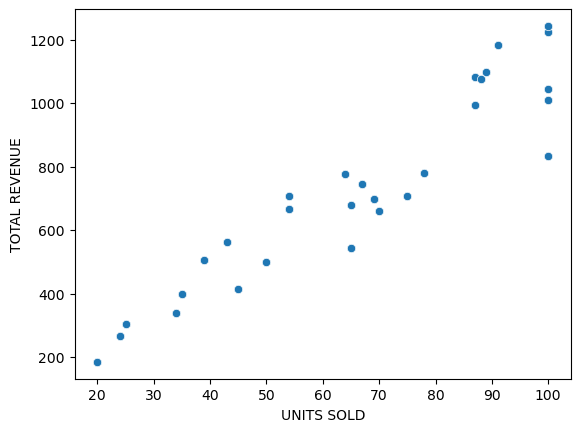

In [36]:
sns.scatterplot(data=df, x='UNITS SOLD',y='TOTAL REVENUE')

In [37]:
clustering2.cluster_centers_

array([[ 66.66666667],
       [ 36.        ],
       [ 88.4       ],
       [ 52.        ],
       [100.        ],
       [ 23.        ],
       [ 76.5       ],
       [ 44.        ]])

<AxesSubplot:xlabel='UNITS SOLD', ylabel='POPULARITY'>

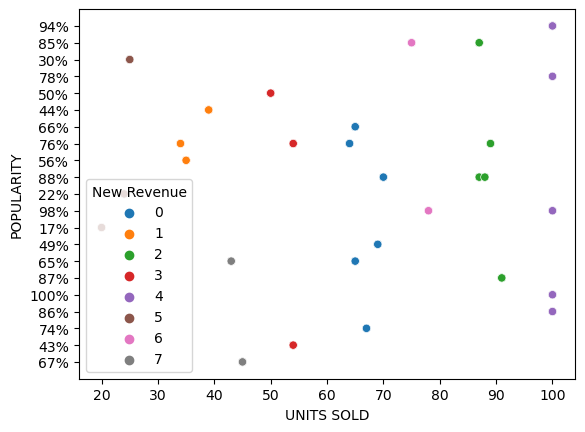

In [38]:
sns.scatterplot(data=df, x='UNITS SOLD',y='POPULARITY',hue='New Revenue',palette='tab10')

In [39]:
pd.crosstab(df['New Revenue'],df['CUISINE'],normalize='index')

CUISINE,AMERICAN,CHINESE,INDIAN,ITALIAN,JAPANESE
New Revenue,,,,,
0,0.150000,0.183333,0.216667,0.216667,0.233333
1,0.233333,0.200000,0.133333,0.200000,0.233333
2,0.140000,0.140000,0.200000,0.320000,0.200000
3,0.225000,0.200000,0.175000,0.200000,0.200000
4,0.260000,0.240000,0.180000,0.120000,0.200000
5,0.166667,0.233333,0.266667,0.166667,0.166667
6,0.150000,0.200000,0.250000,0.300000,0.100000
7,0.150000,0.300000,0.250000,0.100000,0.200000


In [40]:
df

,ITEM LIST,CUISINE,UNITS SOLD,POPULARITY,ITEM FOOD COST,ITEM SELL PRICE,ITEM PROFIT,TOTAL COST,TOTAL REVENUE,Total Revenue,New Revenue
0,ITEM1,ITALIAN,100,94%,4.56,10.11,5.55,1011.00,1011.00,2,4
1,ITEM2,CHINESE,75,85%,3.65,9.43,5.78,707.25,707.25,5,6
2,ITEM3,JAPANESE,25,30%,5.11,12.11,7.00,302.75,302.75,0,5
3,ITEM4,INDIAN,100,78%,2.33,8.34,6.01,834.00,834.00,1,4
4,ITEM5,AMERICAN,50,50%,3.67,10.00,6.33,500.00,500.00,3,3
...,...,...,...,...,...,...,...,...,...,...,...
295,ITEM296,AMERICAN,43,65%,5.98,13.11,7.13,563.73,563.73,3,7
296,ITEM297,INDIAN,67,74%,4.66,11.11,6.45,744.37,744.37,1,0
297,ITEM298,AMERICAN,54,43%,3.66,12.34,8.68,666.36,666.36,5,3
298,ITEM299,ITALIAN,88,88%,2.55,12.23,9.68,1076.24,1076.24,2,2


In [41]:
df.to_csv('clustering.csv')